In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [5]:
train['type']='train'
test['type']='test'

In [6]:
data=pd.concat([train,test],ignore_index=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 8 columns):
Answers       471493 non-null float64
ID            471493 non-null int64
Reputation    471493 non-null float64
Tag           471493 non-null object
Upvotes       330045 non-null float64
Username      471493 non-null int64
Views         471493 non-null float64
type          471493 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 28.8+ MB


In [8]:
data.isnull().sum()

Answers            0
ID                 0
Reputation         0
Tag                0
Upvotes       141448
Username           0
Views              0
type               0
dtype: int64

In [9]:
data.head()

,Answers,ID,Reputation,Tag,Upvotes,Username,Views,type
0,2.0,52664,3942.0,a,42.0,155623,7855.0,train
1,12.0,327662,26046.0,a,1175.0,21781,55801.0,train
2,4.0,468453,1358.0,c,60.0,56177,8067.0,train
3,3.0,96996,264.0,a,9.0,168793,27064.0,train
4,4.0,131465,4271.0,c,83.0,112223,13986.0,train


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Tag']=le.fit_transform(data['Tag'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471493 entries, 0 to 471492
Data columns (total 8 columns):
Answers       471493 non-null float64
ID            471493 non-null int64
Reputation    471493 non-null float64
Tag           471493 non-null int32
Upvotes       330045 non-null float64
Username      471493 non-null int64
Views         471493 non-null float64
type          471493 non-null object
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 27.0+ MB


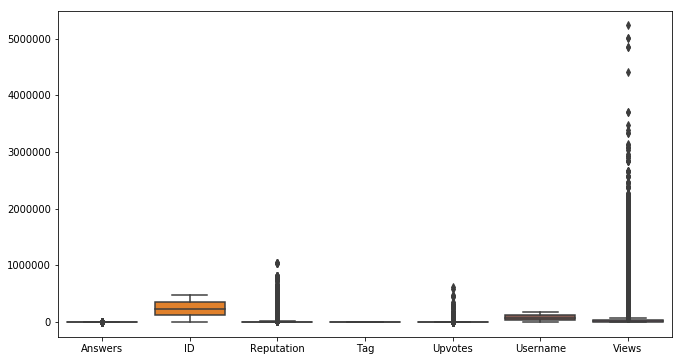

In [12]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)

In [13]:
train = data.loc[data['type']=='train']
test = data.loc[data['type']=='test']

In [14]:
train=train.drop(['type','ID','Username'],axis=1)
test=test.drop(['Upvotes','ID','Username','type'],axis=1)

In [15]:
X_train=train.drop('Upvotes',axis=1)
Y_train=train['Upvotes']
X_test=test

In [16]:
X_train

,Answers,Reputation,Tag,Views
0,2.0,3942.0,0,7855.0
1,12.0,26046.0,0,55801.0
2,4.0,1358.0,1,8067.0
3,3.0,264.0,0,27064.0
4,4.0,4271.0,1,13986.0
5,1.0,440.0,7,5577.0
6,1.0,147.0,1,17184.0
7,2.0,2269.0,4,312.0
8,2.0,111.0,4,53738.0
9,1.0,2749.0,1,227.0


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred1 = rf.predict(X_test)

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred2 = knn.predict(X_test)

le=LinearRegression()
model1=le.fit(X_train,Y_train)
#dtr=DecisionTreeRegressor()
#model=dtr.fit(X_train,Y_train)
Y_pred3=model1.predict(X_test)

Y_pred_final=(Y_pred1+Y_pred2+Y_pred3)/3

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
knn.score(X_train,Y_train)

0.9008228361179699

In [20]:
df=pd.read_csv('test.csv')

In [21]:
a=df['ID']

In [22]:
sub2=pd.DataFrame({'ID':a,'Upvotes':Y_pred_final})

In [23]:
sub2.to_csv('submission.csv',index=False)